<a href="https://colab.research.google.com/github/jsalendres/ML4Development/blob/main/Health_Outcome_Predictions_using_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import jaccard_similarity_score as jss # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

rcParams['figure.figsize'] = (20, 10)


In [11]:
import pandas as pd

gh_url = 'https://raw.githubusercontent.com/abiola1864/ML4Development/main/gh_imputed2.csv'
df = pd.read_csv(gh_url,index_col=0)

mh_url = 'https://raw.githubusercontent.com/abiola1864/ML4Development/main/mh_imputed.csv'
mh = pd.read_csv(mh_url,index_col=0)

ch_url = 'https://raw.githubusercontent.com/abiola1864/ML4Development/main/ch_imputed.csv'
ch = pd.read_csv(ch_url,index_col=0)

print(df.head(5))

     X  v467c  hv204  ...  Wet_Days_2015  smoke  washhands
2    2      0      8  ...      15.180833      1          1
3    3      0      8  ...      15.180833      1          1
4    4      0      8  ...      15.180833      1          1
5    5      0      8  ...      15.180833      1          1
12  12      0     30  ...      15.180833      1          0

[5 rows x 38 columns]


In [12]:
#for the general health dataset first
df.head()

,X,v467c,hv204,hv206,hv207,hv208,hv209,hv210,hv211,hv212,hv216,hv225,hv227,hv243a,hml1,Annual_Precipitation_2015,Aridity_2015,Day_Land_Surface_Temp_2015,Diurnal_Temperature_Range_2015,Enhanced_Vegetation_Index_2015,Global_Human_Footprint,Growing_Season_Length,Irrigation,Land_Surface_Temperature_2015,ITN_Coverage_2015,Mean_Temperature_2015,Nightlights_Composite,Night_Land_Surface_Temp_2015,PET_2015,Proximity_to_National_Borders,Proximity_to_Protected_Areas,Proximity_to_Water,Rainfall_2015,Travel_Times_2015,UN_Population_Density_2015,Wet_Days_2015,smoke,washhands
2,2,0,8,1,1,0,0,1,0,0,1,1,0,1,0,113.26667,37.34066,27.762,11.483334,3437.9,35.081967,11,4.100386,21.684416,0.769893,20.016666,0.071708,15.606833,3.033333,24138.48699,31082.39329,35146.8477,1145.909091,43.120219,581.704064,15.180833,1,1
3,3,0,8,1,1,0,0,1,0,0,1,1,0,1,0,113.26667,37.34066,27.762,11.483334,3437.9,35.081967,11,4.100386,21.684416,0.769893,20.016666,0.071708,15.606833,3.033333,24138.48699,31082.39329,35146.8477,1145.909091,43.120219,581.704064,15.180833,1,1
4,4,0,8,1,1,0,0,1,0,0,1,1,0,1,0,113.26667,37.34066,27.762,11.483334,3437.9,35.081967,11,4.100386,21.684416,0.769893,20.016666,0.071708,15.606833,3.033333,24138.48699,31082.39329,35146.8477,1145.909091,43.120219,581.704064,15.180833,1,1
5,5,0,8,1,1,0,0,1,0,0,1,1,0,1,0,113.26667,37.34066,27.762,11.483334,3437.9,35.081967,11,4.100386,21.684416,0.769893,20.016666,0.071708,15.606833,3.033333,24138.48699,31082.39329,35146.8477,1145.909091,43.120219,581.704064,15.180833,1,1
12,12,0,30,0,1,0,0,1,0,0,1,0,1,1,2,113.26667,37.34066,27.762,11.483334,3437.9,35.081967,11,4.100386,21.684416,0.769893,20.016666,0.071708,15.606833,3.033333,24138.48699,31082.39329,35146.8477,1145.909091,43.120219,581.704064,15.180833,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44988 entries, 2 to 44987
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   X                               44988 non-null  int64  
 1   v467c                           44988 non-null  int64  
 2   hv204                           44988 non-null  int64  
 3   hv206                           44988 non-null  int64  
 4   hv207                           44988 non-null  int64  
 5   hv208                           44988 non-null  int64  
 6   hv209                           44988 non-null  int64  
 7   hv210                           44988 non-null  int64  
 8   hv211                           44988 non-null  int64  
 9   hv212                           44988 non-null  int64  
 10  hv216                           44988 non-null  int64  
 11  hv225                           44988 non-null  int64  
 12  hv227                           

In [14]:
df["Nightlights_Composite"].value_counts()

0.000000     902
0.001757     235
0.588546     221
0.002052     204
0.001847     190
            ... 
0.033270      40
0.000222      38
16.558868     33
0.003979      29
10.089374     28
Name: Nightlights_Composite, Length: 480, dtype: int64

In [15]:
df.describe()

,X,v467c,hv204,hv206,hv207,hv208,hv209,hv210,hv211,hv212,hv216,hv225,hv227,hv243a,hml1,Annual_Precipitation_2015,Aridity_2015,Day_Land_Surface_Temp_2015,Diurnal_Temperature_Range_2015,Enhanced_Vegetation_Index_2015,Global_Human_Footprint,Growing_Season_Length,Irrigation,Land_Surface_Temperature_2015,ITN_Coverage_2015,Mean_Temperature_2015,Nightlights_Composite,Night_Land_Surface_Temp_2015,PET_2015,Proximity_to_National_Borders,Proximity_to_Protected_Areas,Proximity_to_Water,Rainfall_2015,Travel_Times_2015,UN_Population_Density_2015,Wet_Days_2015,smoke,washhands
count,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.00000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000,44988.000000
mean,22494.500000,0.517783,162.658620,0.268516,0.580799,0.151396,0.029341,0.168556,0.022384,0.025918,2.52783,0.167867,0.839290,0.670223,2.006691,118.239987,41.891169,26.863194,11.609315,3507.509932,35.470266,11.923891,0.458516,20.762630,-850.374606,19.298715,1.025445,14.662066,2.857777,23680.332020,29972.461377,23374.102287,1078.388691,37.404914,1127.388953,16.212796,0.819685,0.128123
std,12987.061292,0.499689,327.793449,0.443192,0.493434,0.358438,0.168763,0.374363,0.147930,0.158893,1.03981,0.373752,0.367267,0.470137,1.368400,21.126897,9.565156,3.180416,0.592155,506.332939,7.571890,1.139301,1.243068,2.774265,2790.428815,1.388702,3.216832,2.526850,0.183175,14561.540236,19104.858188,13770.484973,216.128756,28.398749,1759.374216,0.619992,0.384454,0.334230
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,86.991669,28.202631,17.756668,10.050000,105.000000,19.472527,10.000000,0.000000,11.814999,-9999.000000,16.708334,0.000000,5.873333,2.450000,225.643966,0.000000,0.000000,740.600000,0.000000,145.523895,15.180833,0.000000,0.000000
25%,11247.750000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,1.000000,0.000000,1.000000,101.383331,35.060516,24.252667,11.283334,3400.600000,30.915301,11.000000,0.000000,18.686667,0.659441,18.025000,0.007588,13.289722,2.691667,10862.760050,13068.324810,12557.675680,875.200000,15.357143,458.852473,15.849167,1.000000,0.000000
50%,22494.500000,1.000000,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000,1.000000,1.000000,2.000000,121.599999,41.104225,27.553148,11.558333,3612.250000,34.115242,12.000000,0.000000,21.661482,0.725645,19.666668,0.027689,15.671167,2.891667,22674.780890,28938.692330,23393.676430,1051.400000,34.498630,553.622628,16.532499,1.000000,0.000000
75%,33741.250000,1.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,0.000000,1.000000,1.000000,3.000000,133.483337,50.529968,29.392965,12.191667,3803.666667,38.260163,13.000000,0.217546,22.945910,0.765263,20.016666,0.170089,16.486666,3.000000,37382.571370,46502.618000,32385.721920,1237.416667,53.297521,748.146228,16.561666,1.000000,0.000000
max,44988.000000,1.000000,998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.00000,1.000000,1.000000,1.000000,7.000000,153.533341,56.864197,32.941666,12.875000,4385.000000,64.142857,14.000000,10.966730,24.839167,0.870800,21.575001,21.800807,18.346666,3.166667,55444.901540,71428.815020,65493.432620,1621.000000,175.811475,10562.064580,17.305834,1.000000,1.000000


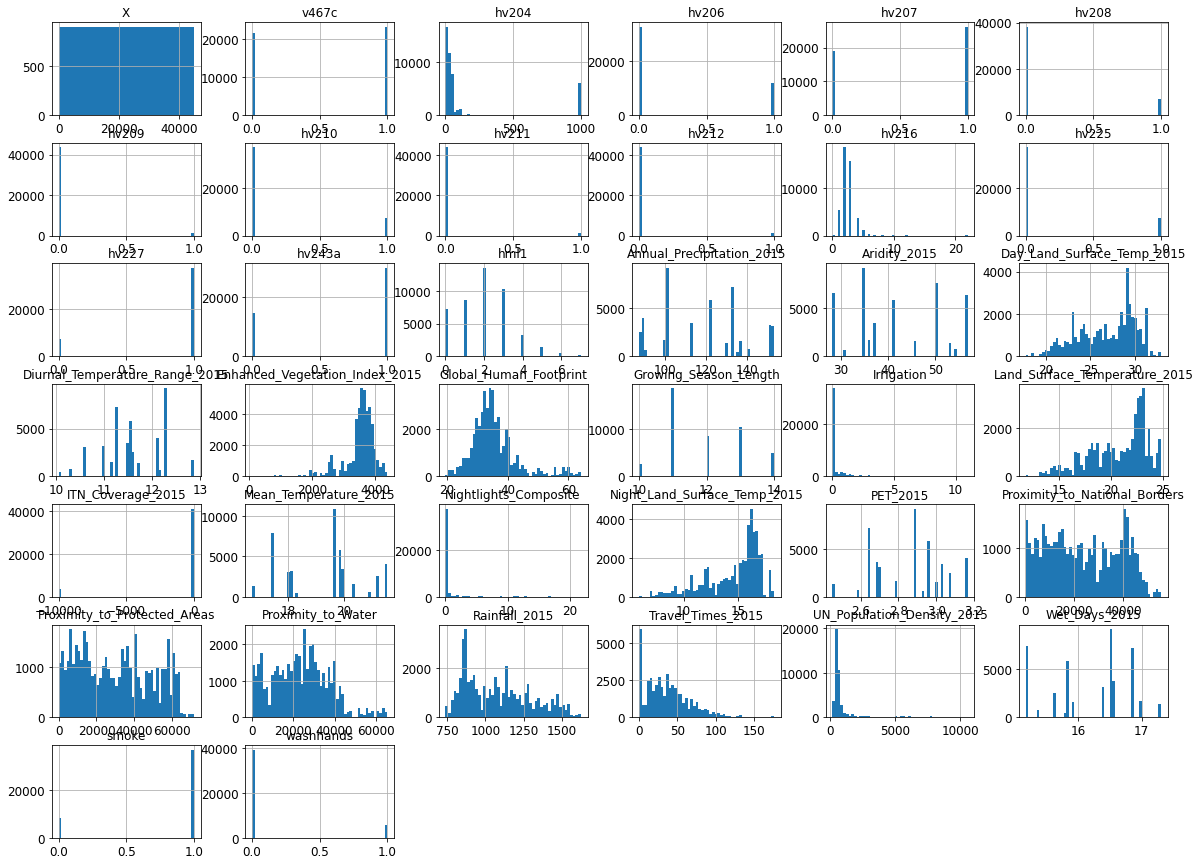

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
df.rename(columns={"Nightlights_Composite": "NL"}, inplace=True)


In [19]:
df = df.dropna()


In [20]:
X = df['NL'].values.reshape (-1, 1) #reshape to get a one-dimensional column array
y = df['v467c'].values.reshape (-1, 1)#reshape to get a one-dimensional column array

X.shape

(44988, 1)

**splitting the data**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**getting a baseline**

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
lr = LogisticRegression(C = 0.1, solver = 'liblinear')
lr.fit(X_train_scaled,y_train)

print(cl(lr, attrs = ['bold']))

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**predictions**

In [37]:
yhat = lr.predict(X_test_scaled)
yhat_prob = lr.predict_proba(X_test_scaled)

print(cl('yhat samples : ', attrs = ['bold']), yhat[:10])
print(cl('yhat_prob samples : ', attrs = ['bold']), yhat_prob[:10])

yhat samples :  [1 1 1 1 0 1 1 1 1 1]
yhat_prob samples :  [[0.47 0.53]
 [0.47 0.53]
 [0.47 0.53]
 [0.47 0.53]
 [0.51 0.49]
 [0.47 0.53]
 [0.47 0.53]
 [0.47 0.53]
 [0.47 0.53]
 [0.47 0.53]]


In the above code, ‘predict_proba’ returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and the second column is the probability of class 0, P(Y=0|X).

In [38]:
# 1. Jaccard Index
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat).round(2)), attrs = ['bold']))


Jaccard Similarity Score of our model is 0.55


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [39]:
# 2. Precision Score

print(cl('Precision Score of our model is {}'.format(precision_score(y_test, yhat).round(2)), attrs = ['bold']))


Precision Score of our model is 0.53


In [40]:
# 3. Log loss

print(cl('Log Loss of our model is {}'.format(log_loss(y_test, yhat).round(2)), attrs = ['bold']))


Log Loss of our model is 15.67


The lower the log loss the better the model, here the log loss is high  

In [41]:
# 4. Classificaton report

print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.66      0.13      0.22      4365
           1       0.53      0.94      0.68      4633

    accuracy                           0.55      8998
   macro avg       0.60      0.53      0.45      8998
weighted avg       0.60      0.55      0.46      8998



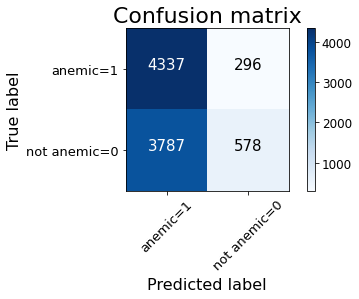

In [32]:
# 5. Confusion matrix

def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['anemic=1','not anemic=0'], normalize = False,  title = 'Confusion matrix')
plt.savefig('confusion_matrix.png')

In [42]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse



0.4463990921876524

In [43]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

0.44865379870763267

I get 0.446 for trained, and 0.449 for test data



**testing for maternal health
